In [11]:
import pandas as pd
import numpy as np
from collections import Counter
import statsmodels.api as sm
import matplotlib.pyplot as plt
train_dat = pd.read_csv('/data/corp/yizhen.yan/protein_tm/data/data/train_fixed.csv')

In [12]:
train_dat.head()

,seq_id,protein_sequence,pH,data_source,tm
0,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,0.2,NaN,64.9
1,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,0.1,NaN,64.9
2,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,NaN,55.6
3,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6
4,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6


In [18]:
def prop_polar_count(seq_matrix):
    prop_polar_lst = []
    for _seq in seq_matrix['protein_sequence']:
        base_counter = Counter(_seq)
        count_polar = base_counter['S'] +  base_counter['T'] +  base_counter['Y'] +  base_counter['N'] +  base_counter['Q']
        _prop_polar = count_polar/len(_seq)*100
        prop_polar_lst.append(_prop_polar)
    seq_matrix['prop_polar'] = prop_polar_lst
    return seq_matrix

In [19]:
train_dat = prop_polar_count(train_dat)
train_dat.head()

,seq_id,protein_sequence,pH,data_source,tm,prop_polar
0,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,0.2,NaN,64.9,23.648649
1,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,0.1,NaN,64.9,23.648649
2,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,NaN,55.6,35.416667
3,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6,36.458333
4,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6,36.458333


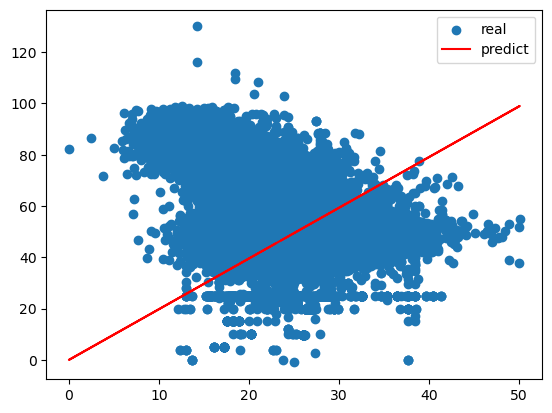

In [21]:
model = sm.OLS(train_dat['tm'], train_dat['prop_polar']).fit()
predicts = model.predict() 
plt.scatter(train_dat['prop_polar'], train_dat['tm'], label='real') 
plt.plot(train_dat['prop_polar'], predicts, color = 'red', label='predict')
plt.legend() 
plt.show()

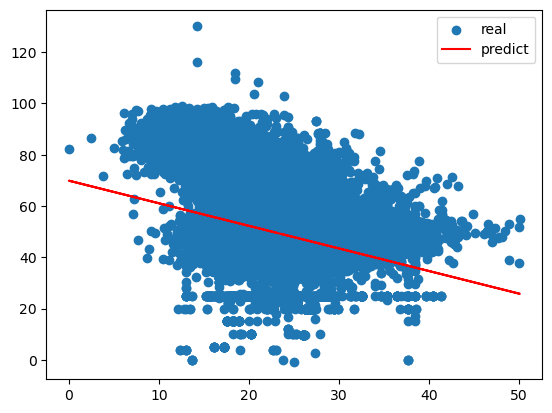

In [27]:
x = sm.add_constant(train_dat['prop_polar'])
model = sm.OLS(train_dat['tm'], x).fit()
predicts = model.predict() 
plt.scatter(train_dat['prop_polar'], train_dat['tm'], label='real') 
plt.plot(train_dat['prop_polar'], predicts, color = 'red', label='predict')
plt.legend() 
plt.show()


In [29]:
def prop_hydro_count(seq_matrix):
    prop_hydro_lst = []
    for _seq in seq_matrix['protein_sequence']:
        base_counter = Counter(_seq)
        count_polar = base_counter['A'] +  base_counter['V'] +  base_counter['I'] +  base_counter['L'] +  base_counter['M']+ \
        base_counter['F']+  base_counter['W']
        _prop_hydro = count_polar/len(_seq)*100
        prop_hydro_lst.append(_prop_hydro)
    seq_matrix['prop_hydro'] = prop_hydro_lst
    return seq_matrix

In [30]:
train_dat = prop_hydro_count(train_dat)
train_dat.head()

,seq_id,protein_sequence,pH,data_source,tm,prop_polar,prop_hydro
0,13447,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,0.2,NaN,64.9,23.648649,39.189189
1,13449,MKALIVLGLVLLSVTVQGKVFERCELARTLKRLGMDGYRGISLANW...,0.1,NaN,64.9,23.648649,38.513514
2,989,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,NaN,55.6,35.416667,28.125000
3,1014,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6,36.458333,28.125000
4,1079,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...,5.5,NaN,55.6,36.458333,27.083333


In [31]:
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     tm   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3129.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:27:02   Log-Likelihood:            -1.2583e+05
No. Observations:               31409   AIC:                         2.517e+05
Df Residuals:                   31407   BIC:                         2.517e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.8791      0.377    185.208      0.0

In [32]:
x = sm.add_constant(train_dat[['prop_polar','prop_hydro']])
model = sm.OLS(train_dat['tm'], x).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     tm   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1615.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:27:06   Log-Likelihood:            -1.2578e+05
No. Observations:               31409   AIC:                         2.516e+05
Df Residuals:                   31406   BIC:                         2.516e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5289      0.947     64.950      0.0

In [33]:
test_dat = pd.read_csv('/data/corp/yizhen.yan/protein_tm/data/data/test.csv')
test_dat.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [35]:
test_dat = prop_hydro_count(test_dat)
test_dat = prop_polar_count(test_dat)
x = sm.add_constant(test_dat[['prop_polar','prop_hydro']])
test_dat['tm'] = model.predict(x) 
test_dat.head()

,seq_id,protein_sequence,pH,data_source,prop_hydro,prop_polar,tm
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,30.316742,28.959276,43.812743
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,30.316742,28.959276,43.812743
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes,30.454545,29.090909,43.732215
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,30.769231,28.959276,43.888788
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes,31.221719,28.959276,43.964833


In [36]:
test_dat[['seq_id','tm']].to_csv('sub_20221219_A.csv',index = False)